In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
ref = 1025
n = 16

x = linspace(0,1,1025)

Pn = zeros((ref,n))

for i in range(n):
    Pn[:, i] = x**i

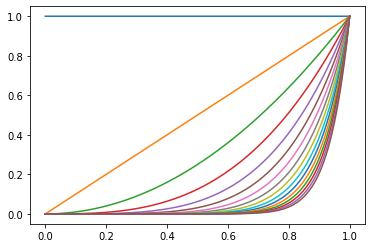

In [29]:
_ = plot(x, Pn)

In [30]:
#I want to plot p = 1 - x + 3 x**2 - 3 x**3 
#Matrix product for a vector in that base
p = Pn.dot(array([1,-1,3,-3,0,0]))

ValueError: shapes (1025,16) and (6,) not aligned: 16 (dim 1) != 6 (dim 0)

ValueError: x and y must have same first dimension, but have shapes (1025,) and (6,)

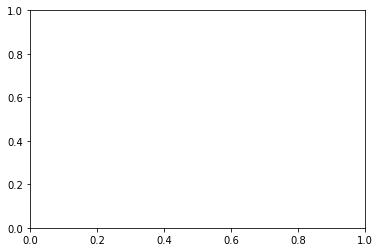

In [31]:
plot(x,p)

In [32]:
q = linspace(0,1,n)
A = zeros((n,n))

for i in range(n):
    A[:,i] = q**i

In [33]:
A #Vandermonde Matrix

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.66666667e-02, 4.44444444e-03, 2.96296296e-04,
        1.97530864e-05, 1.31687243e-06, 8.77914952e-08, 5.85276635e-09,
        3.90184423e-10, 2.60122949e-11, 1.73415299e-12, 1.15610199e-13,
        7.70734663e-15, 5.13823109e-16, 3.42548739e-17, 2.28365826e-18],
       [1.00000000e+00, 1.33333333e-01, 1.77777778e-02, 2.37037037e-03,
        3.16049383e-04, 4.21399177e-05, 5.61865569e-06, 7.49154092e-07,
        9.98872123e-08, 1.33182950e-08, 1.77577266e-09, 2.36769688e-10,
        3.15692918e-11, 4.20923891e-12, 5.61231854e-13, 7.48309139e-14],
       [1.00000000e+00, 2.00000000e-01, 4.00000000e-02, 8.00000000e-03,
        1.60000000e-03, 3.20000000e-04, 6.40000000e-05, 1.280

In [34]:
def runge(x):
    return 1./(1+50*(x-.5)**2)

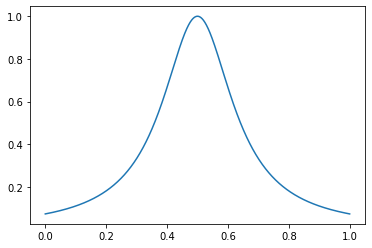

In [35]:
plot(x, runge(x))

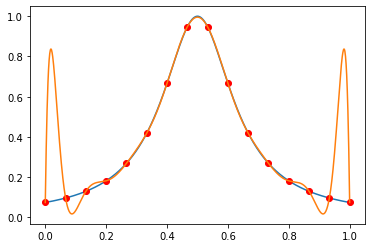

In [36]:
G = runge(q)
p = linalg.solve(A,G)

plot(x,runge(x))
plot(q, runge(q), 'ro')
plot(x, Pn.dot(p))

In [37]:
lebesgue = sum(abs(Pn), axis = 1)

In [38]:
lebesgue.shape

(1025,)

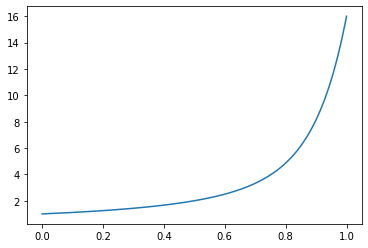

In [39]:
plot(x, lebesgue)

In [40]:
linalg.cond(A)

3121676336416.1743

In [78]:
n = 5
q = linspace(0,1,n)
Ln = zeros((ref,n))

def compute_lagrange_basis_function(x,q,n):
    
    for i in range(n):
        Ln[:,i] = 1
        for j in range(n):
            if j != i:
                Ln[:,i] *= (x -q[j])/(q[i] - q[j])
    return Ln

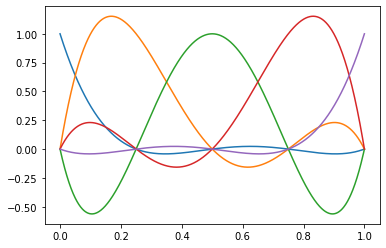

In [79]:
Ln = compute_lagrange_basis_function(x,q,n)
plot(x, Ln)

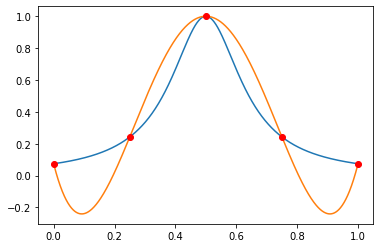

In [50]:
plot(x, runge(x))
plot(x, Ln.dot(runge(q)))
plot(q, runge(q), 'ro')

In [67]:
def interpolation(x,q,f):
    """
    Evaluate the polynomial interpolation "p" of f at the points x
    such that 
    
    f(q[i]) = p(q[i])
    
    """
    
    ref = len(x)
    n = len(q)
    Ln = ones((ref,n))
    #Ln.ones instead of Ln[:,i]...
    
    for i in range(n):
        for j in range(n):
            if j != i:
                Ln[:,i] *= (x -q[j])/(q[i] - q[j])
    return Ln.dot(f(q))

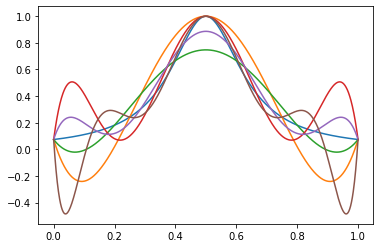

In [68]:
plot(x,runge(x))

for n in range(5,10):
    q = linspace(0,1,n)
    p = interpolation(x,q,runge)
    
    plot(x,p)

In [82]:
def compute_lebesgue_function(x,q,n):
    """
    Compute the Lebesgue function (evaluated at x)
    associated to the Lagrangian
    interpolation based on quadrature points q
    """
    Ln = compute_lagrange_basis_function(x,q,n)
    return sum(abs(Ln), axis = 1)

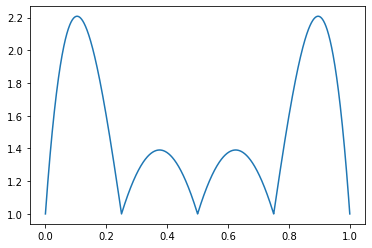

In [89]:
plot(x, compute_lebesgue_function(x,q,n))

In [97]:
#MACRO (this is not self consistent, then it's not a function)
def cost_function(q):
    """
    Assume x is defined globally.
    Compute lebesgue function associated to q, and return its maximum
    on the points x.
    """
    return (max(compute_lebesgue_function(x,q,n)))

In [98]:
import scipy
import scipy.optimize

q = linspace(0,1,5)

qopt = scipy.optimize.minimize(cost_function,q)
#in qopt.x you can find the values that minimizes the cost function with a given q.

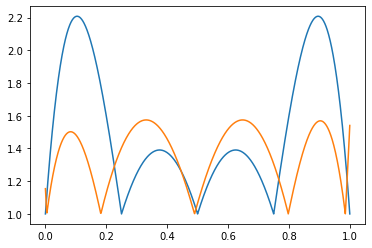

In [100]:
plot(x,compute_lebesgue_function(x,q,n))
plot(x, compute_lebesgue_function(x,qopt.x,n))